# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

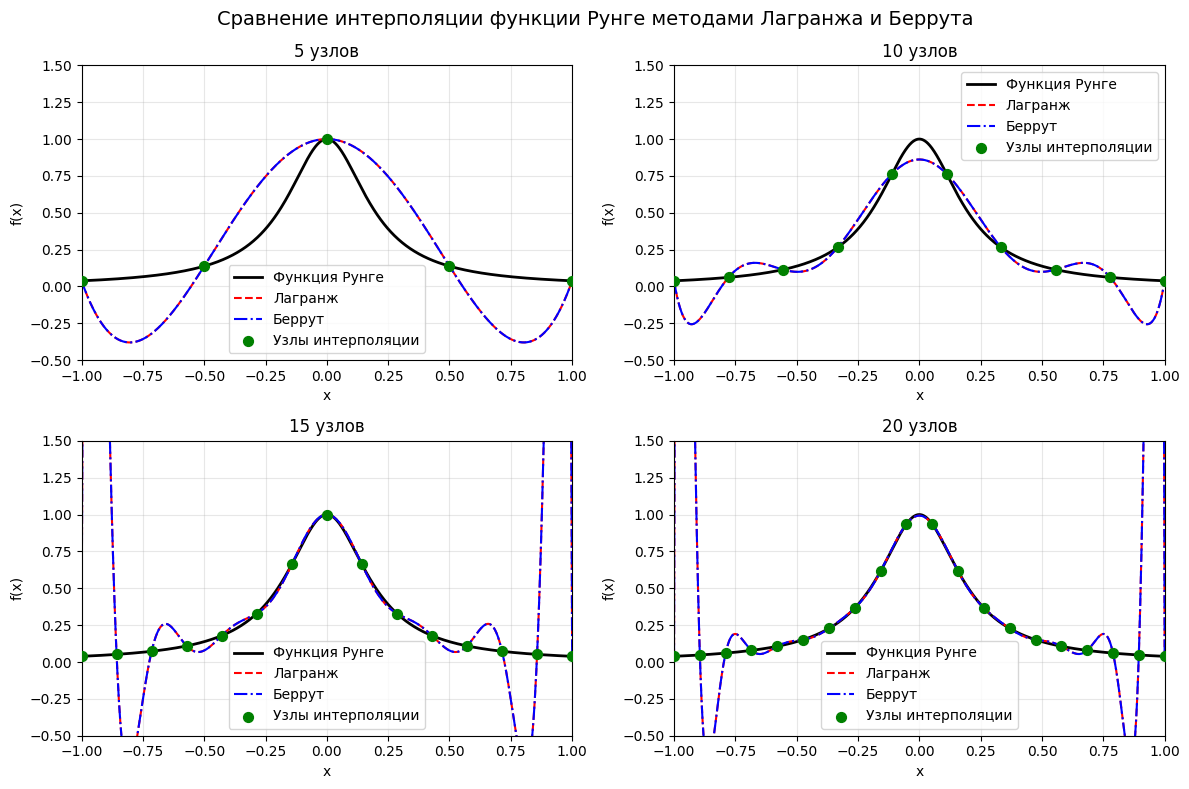

In [ ]:
def runge_func(x):
    return 1.0 / (1.0 + 25*x**2)

def lagrange_interpolation(x_nodes, y_nodes, x):
    n = len(x_nodes)
    result = 0.0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if i != j:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

def barycentric_weights(x_nodes):
    n = len(x_nodes)
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if k != j:
                w[j] /= (x_nodes[j] - x_nodes[k])
    return w

def berrut_interpolation(x_nodes, y_nodes, x, weights=None):
    if weights is None:
        weights = barycentric_weights(x_nodes)
    
    numerator = 0.0
    denominator = 0.0
    
    for j in range(len(x_nodes)):
        diff = x - x_nodes[j]
        if abs(diff) < 1e-12:  
            return y_nodes[j]
        
        term = weights[j] / diff
        numerator += term * y_nodes[j]
        denominator += term
    
    return numerator / denominator

x_min, x_max = -1, 1 
n_nodes_list = [5, 10, 15, 20]  

x_plot = np.linspace(x_min, x_max, 1000)
y_true = runge_func(x_plot)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, n_nodes in enumerate(n_nodes_list):
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)
    
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
    
    weights = barycentric_weights(x_nodes)
    y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
    
    ax = axes[idx]
    ax.plot(x_plot, y_true, 'k-', label='Функция Рунге', linewidth=2)
    ax.plot(x_plot, y_lagrange, 'r--', label='Лагранж', linewidth=1.5)
    ax.plot(x_plot, y_berrut, 'b-.', label='Беррут', linewidth=1.5)
    ax.scatter(x_nodes, y_nodes, color='green', s=50, label='Узлы интерполяции', zorder=5)
    
    ax.set_title(f'{n_nodes} узлов')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(-0.5, 1.5)

plt.suptitle('Сравнение интерполяции функции Рунге методами Лагранжа и Беррута', fontsize=14)
plt.tight_layout()
plt.show()


## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

In [ ]:
def calculate_errors(y_true, y_pred):
    errors = np.abs(y_true - y_pred)
    
    mae = np.mean(errors)  
    max_error = np.max(errors)  
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))  
    
    return mae, max_error, rmse

print("Анализ ошибок интерполяции функции Рунге:")
print("="*70)
print(f"{'Кол-во узлов':<12} {'Метод':<10} {'MAE':<12} {'Max Error':<12} {'RMSE':<12}")
print("-"*70)

for n_nodes in [5, 10, 15, 20]:
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)
    
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
    weights = barycentric_weights(x_nodes)
    y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
    
    mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)
    
    print(f"{n_nodes:<12} {'Лагранж':<10} {mae_lag:<12.6f} {max_lag:<12.6f} {rmse_lag:<12.6f}")
    print(f"{'':<12} {'Беррут':<10} {mae_ber:<12.6f} {max_ber:<12.6f} {rmse_ber:<12.6f}")
    print("-"*70)

Анализ ошибок интерполяции функции Рунге:
Кол-во узлов Метод      MAE          Max Error    RMSE        
----------------------------------------------------------------------
5            Лагранж    0.245929     0.438350     0.279048    
             Беррут     0.245929     0.438350     0.279048    
----------------------------------------------------------------------
10           Лагранж    0.079429     0.300285     0.109543    
             Беррут     0.079429     0.300285     0.109543    
----------------------------------------------------------------------
15           Лагранж    0.664485     7.192324     1.770660    
             Беррут     0.664485     7.192324     1.770660    
----------------------------------------------------------------------
20           Лагранж    0.545809     8.575361     1.777533    
             Беррут     0.545809     8.575361     1.777533    
----------------------------------------------------------------------


## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



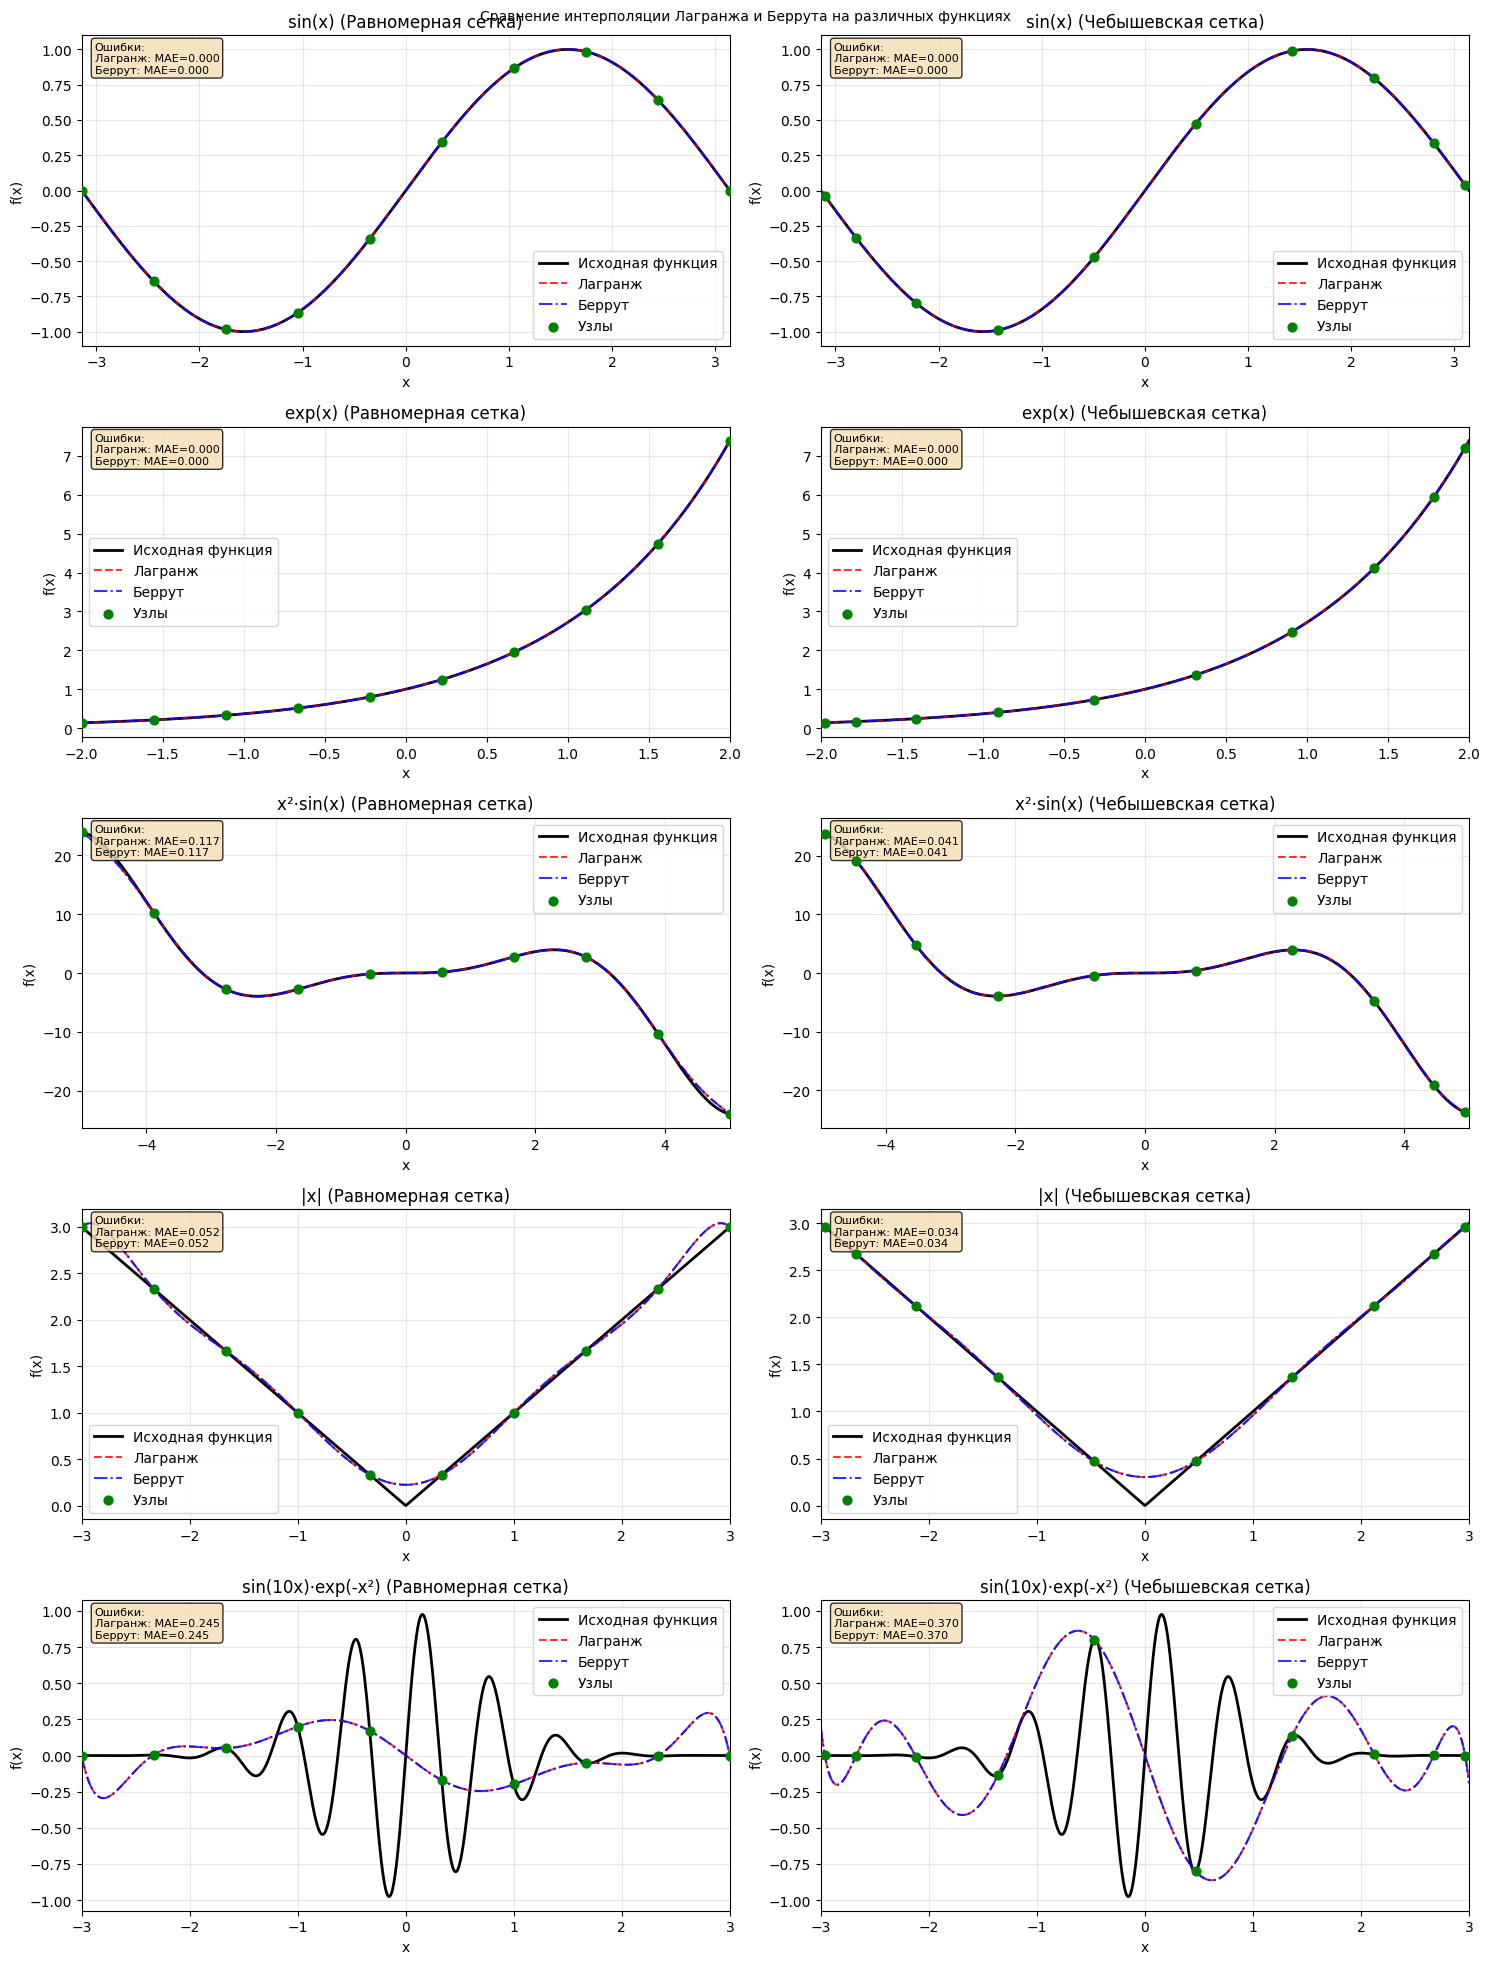

In [8]:
test_functions = [
    {
        'name': 'sin(x)',
        'func': lambda x: np.sin(x),
        'interval': [-np.pi, np.pi]
    },
    {
        'name': 'exp(x)',
        'func': lambda x: np.exp(x),
        'interval': [-2, 2]
    },
    {
        'name': 'x²·sin(x)',
        'func': lambda x: x**2 * np.sin(x),
        'interval': [-5, 5]
    },
    {
        'name': '|x|',
        'func': lambda x: np.abs(x),
        'interval': [-3, 3]
    },
    {
        'name': 'sin(10x)·exp(-x²)',
        'func': lambda x: np.sin(10*x) * np.exp(-x**2),
        'interval': [-3, 3]
    }
]

n_nodes = 10

fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, func_info in enumerate(test_functions):
    name = func_info['name']
    func = func_info['func']
    a, b = func_info['interval']
    
    x_plot = np.linspace(a, b, 1000)
    y_true = func(x_plot)
    
    x_uniform = np.linspace(a, b, n_nodes)
    y_uniform = func(x_uniform)
    
    cheb_nodes = np.array([(a + b)/2 + (b - a)/2 * np.cos((2*k + 1) * np.pi / (2*n_nodes)) 
                          for k in range(n_nodes)])[::-1]
    x_cheb = cheb_nodes
    y_cheb = func(x_cheb)
    
    for j, (x_nodes, y_nodes, grid_type) in enumerate([
        (x_uniform, y_uniform, 'Равномерная'),
        (x_cheb, y_cheb, 'Чебышевская')
    ]):
        ax = axes[i, j]
        
        weights = barycentric_weights(x_nodes)
        y_lagrange = np.array([lagrange_interpolation(x_nodes, y_nodes, xi) for xi in x_plot])
        y_berrut = np.array([berrut_interpolation(x_nodes, y_nodes, xi, weights) for xi in x_plot])
        
        ax.plot(x_plot, y_true, 'k-', label='Исходная функция', linewidth=2)
        ax.plot(x_plot, y_lagrange, 'r--', label='Лагранж', linewidth=1.5, alpha=0.8)
        ax.plot(x_plot, y_berrut, 'b-.', label='Беррут', linewidth=1.5, alpha=0.8)
        ax.scatter(x_nodes, y_nodes, color='green', s=40, label='Узлы', zorder=5)
        
        mae_lag, max_lag, rmse_lag = calculate_errors(y_true, y_lagrange)
        mae_ber, max_ber, rmse_ber = calculate_errors(y_true, y_berrut)
        
        text = f'Ошибки:\nЛагранж: MAE={mae_lag:.3f}\nБеррут: MAE={mae_ber:.3f}'
        ax.text(0.02, 0.98, text, transform=ax.transAxes, 
                verticalalignment='top', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        ax.set_title(f'{name} ({grid_type} сетка)')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        ax.set_xlim(a, b)

plt.suptitle('Сравнение интерполяции Лагранжа и Беррута на различных функциях', fontsize=10)
plt.tight_layout()
plt.show()

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

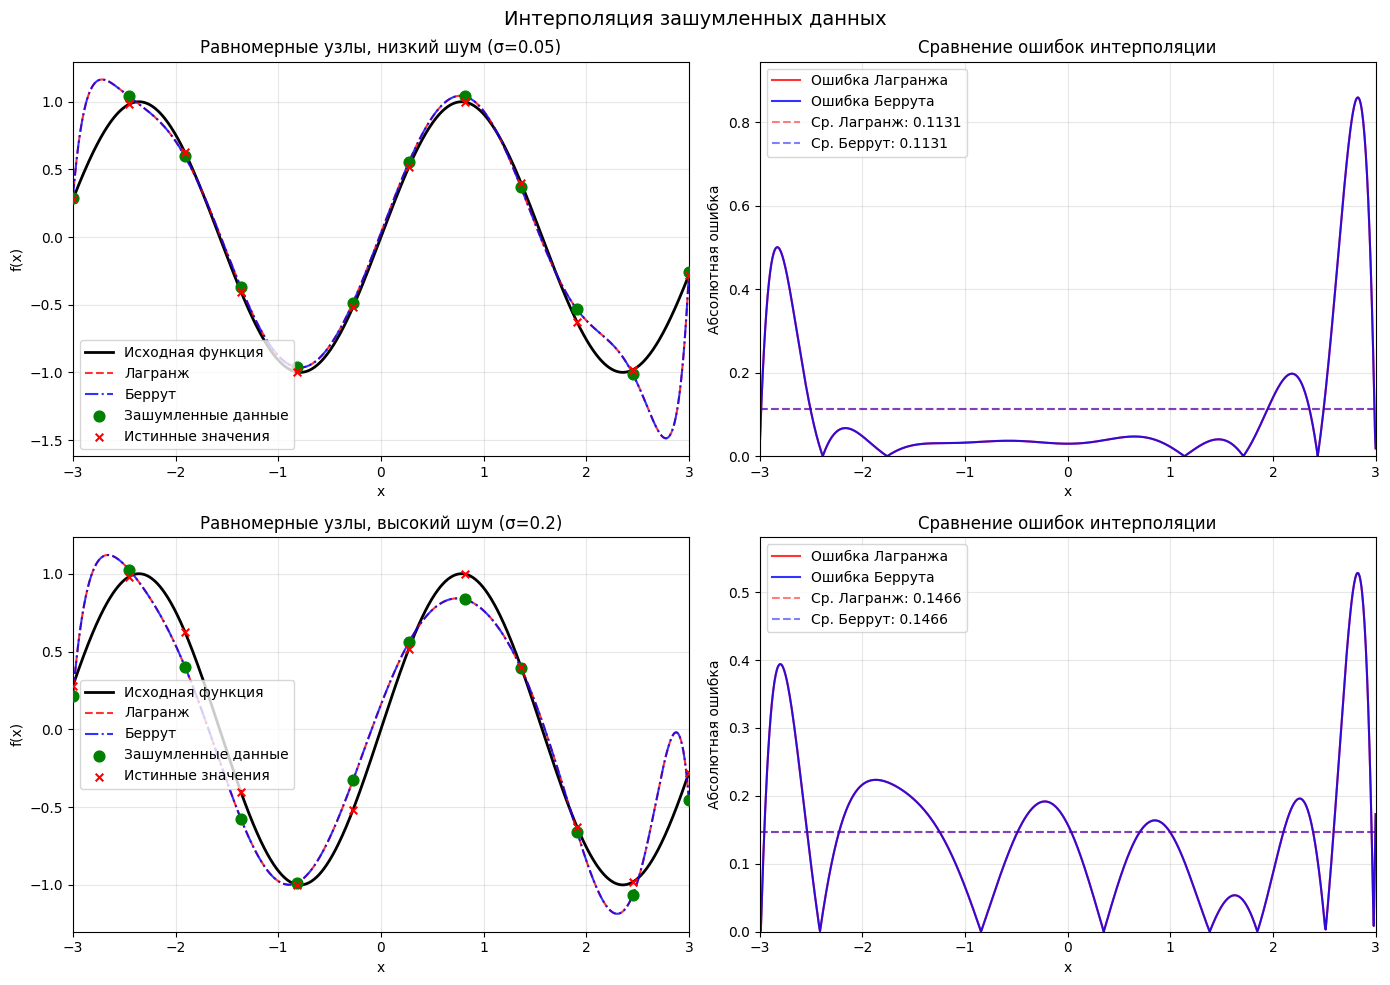

СТАТИСТИКА ПОГРЕШНОСТЕЙ ДЛЯ ЗАШУМЛЕННЫХ ДАННЫХ

Равномерные узлы, низкий шум (σ=0.05):
----------------------------------------
Метод Лагранжа:
  MAE = 0.166886
  Макс. ошибка = 1.382253
  RMSE = 0.316981

Метод Беррута:
  MAE = 0.166886
  Макс. ошибка = 1.382253
  RMSE = 0.316981

Равномерные узлы, высокий шум (σ=0.2):
----------------------------------------
Метод Лагранжа:
  MAE = 0.758978
  Макс. ошибка = 5.819684
  RMSE = 1.537876

Метод Беррута:
  MAE = 0.758978
  Макс. ошибка = 5.819684
  RMSE = 1.537876


In [9]:
def generate_noisy_data(nodes, noise_level, func):
    y_true = func(nodes)
    noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

test_func = lambda x: np.sin(2*x)

a, b = -3, 3
x_plot = np.linspace(a, b, 1000)
y_true_plot = test_func(x_plot)

variants = [
    {
        'name': 'Равномерные узлы, низкий шум (σ=0.05)',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.05
    },
    {
        'name': 'Равномерные узлы, высокий шум (σ=0.2)',
        'nodes': np.linspace(a, b, 12),
        'noise_level': 0.2
    }
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, variant in enumerate(variants):
    x_nodes = variant['nodes']
    noise_level = variant['noise_level']
    
    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)
    
    weights = barycentric_weights(x_nodes)
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi) for xi in x_plot])
    y_berrut = np.array([berrut_interpolation(x_nodes, y_noisy, xi, weights) for xi in x_plot])
    
    ax1 = axes[idx, 0]
    ax1.plot(x_plot, y_true_plot, 'k-', label='Исходная функция', linewidth=2)
    ax1.plot(x_plot, y_lagrange, 'r--', label='Лагранж', linewidth=1.5, alpha=0.8)
    ax1.plot(x_plot, y_berrut, 'b-.', label='Беррут', linewidth=1.5, alpha=0.8)
    ax1.scatter(x_nodes, y_noisy, color='green', s=60, label='Зашумленные данные', zorder=5)
    ax1.scatter(x_nodes, y_true_nodes, color='red', s=30, label='Истинные значения', zorder=6, marker='x')
    
    ax1.set_title(variant['name'])
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    ax1.set_xlim(a, b)
    
    ax2 = axes[idx, 1]
    errors_lag = np.abs(y_true_plot - y_lagrange)
    errors_ber = np.abs(y_true_plot - y_berrut)
    
    ax2.plot(x_plot, errors_lag, 'r-', label='Ошибка Лагранжа', linewidth=1.5, alpha=0.8)
    ax2.plot(x_plot, errors_ber, 'b-', label='Ошибка Беррута', linewidth=1.5, alpha=0.8)
    
    mae_lag = np.mean(errors_lag)
    mae_ber = np.mean(errors_ber)
    
    ax2.axhline(y=mae_lag, color='r', linestyle='--', alpha=0.5, label=f'Ср. Лагранж: {mae_lag:.4f}')
    ax2.axhline(y=mae_ber, color='b', linestyle='--', alpha=0.5, label=f'Ср. Беррут: {mae_ber:.4f}')
    
    ax2.set_title('Сравнение ошибок интерполяции')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Абсолютная ошибка')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='best')
    ax2.set_xlim(a, b)
    ax2.set_ylim(0, max(np.max(errors_lag), np.max(errors_ber)) * 1.1)

plt.suptitle('Интерполяция зашумленных данных', fontsize=14)
plt.tight_layout()
plt.show()


print("СТАТИСТИКА ПОГРЕШНОСТЕЙ ДЛЯ ЗАШУМЛЕННЫХ ДАННЫХ")


for variant in variants:
    print(f"\n{variant['name']}:")
    print("-"*40)
    
    x_nodes = variant['nodes']
    noise_level = variant['noise_level']
    y_true_nodes, y_noisy = generate_noisy_data(x_nodes, noise_level, test_func)
    
    weights = barycentric_weights(x_nodes)
    y_lagrange = np.array([lagrange_interpolation(x_nodes, y_noisy, xi) for xi in x_plot])
    y_berrut = np.array([berrut_interpolation(x_nodes, y_noisy, xi, weights) for xi in x_plot])
    
    mae_lag, max_lag, rmse_lag = calculate_errors(y_true_plot, y_lagrange)
    mae_ber, max_ber, rmse_ber = calculate_errors(y_true_plot, y_berrut)
    
    print(f"Метод Лагранжа:")
    print(f"  MAE = {mae_lag:.6f}")
    print(f"  Макс. ошибка = {max_lag:.6f}")
    print(f"  RMSE = {rmse_lag:.6f}")
    
    print(f"\nМетод Беррута:")
    print(f"  MAE = {mae_ber:.6f}")
    print(f"  Макс. ошибка = {max_ber:.6f}")
    print(f"  RMSE = {rmse_ber:.6f}")